In [1]:
import pandas as pd

## 1. Business Dataset

In [8]:
business = pd.read_json("yelp_academic_dataset_business.json",lines=True,orient='records')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [9]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [43]:
business.loc[3]['categories']

'Beauty & Spas, Hair Salons'

## 2. Reviews

In [12]:
import datetime

In [17]:
limit = datetime.datetime(year=2019,month=1,day=1)

In [19]:
df=pd.DataFrame([])
for chunk in pd.read_json("yelp_academic_dataset_review.json",lines=True,orient='records',chunksize=100000):
    df=pd.concat([df,chunk.loc[chunk.date>limit]])
    print(df.shape)

(0, 9)
(0, 9)
(0, 9)
(0, 9)
(2920, 9)
(12024, 9)
(71650, 9)


KeyboardInterrupt: 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71650 entries, 410008 to 699997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    71650 non-null  object        
 1   user_id      71650 non-null  object        
 2   business_id  71650 non-null  object        
 3   stars        71650 non-null  int64         
 4   useful       71650 non-null  int64         
 5   funny        71650 non-null  int64         
 6   cool         71650 non-null  int64         
 7   text         71650 non-null  object        
 8   date         71650 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 5.5+ MB


In [21]:
df.to_csv('yelp_reviews_small.csv')

In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    100000 non-null  object        
 1   user_id      100000 non-null  object        
 2   business_id  100000 non-null  object        
 3   stars        100000 non-null  int64         
 4   useful       100000 non-null  int64         
 5   funny        100000 non-null  int64         
 6   cool         100000 non-null  int64         
 7   text         100000 non-null  object        
 8   date         100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 6.9+ MB


In [52]:
reviews.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06


In [17]:
reviews.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.773000,1.004700,0.323300,0.379000
std,1.376031,2.118803,1.130356,1.238916
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,49.000000,27.000000,34.000000


<AxesSubplot:>

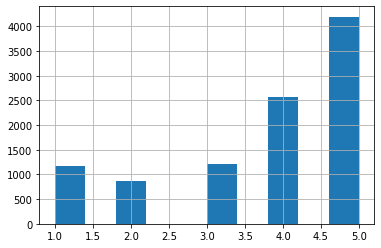

In [45]:
reviews.stars.hist()

<AxesSubplot:>

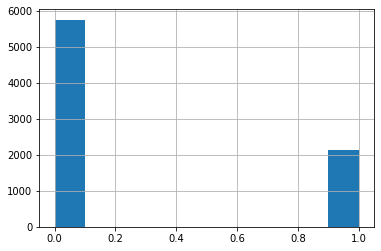

In [49]:
#reviews.useful.hist()
reviews.loc[reviews.useful<2].useful.hist()

<AxesSubplot:>

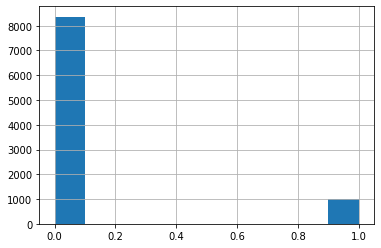

In [41]:
#reviews.funny.hist()
reviews.loc[reviews.funny<2].funny.hist()

<AxesSubplot:>

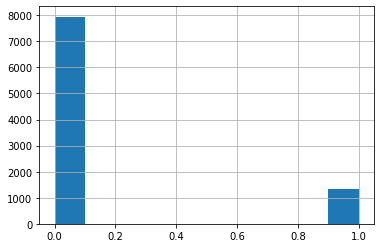

In [40]:
#reviews.cool.hist()
reviews.loc[reviews.cool<2].cool.hist()

## 3. Tip Dataset

In [13]:
tip = pd.read_json("yelp_academic_dataset_tip.json",lines=True,orient='records')
tip.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


In [14]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162119 entries, 0 to 1162118
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1162119 non-null  object        
 1   business_id       1162119 non-null  object        
 2   text              1162119 non-null  object        
 3   date              1162119 non-null  datetime64[ns]
 4   compliment_count  1162119 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 44.3+ MB


## 4. Users Data

In [15]:
for chunk in pd.read_json("yelp_academic_dataset_user.json",lines=True,orient='records',chunksize=10000):
    user = chunk
    break
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [16]:
user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')